Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier#
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Read and preprocess the data

In [2]:
data=pd.read_csv("/content/glass.csv")

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.shape

(214, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
data.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [8]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<Axes: >

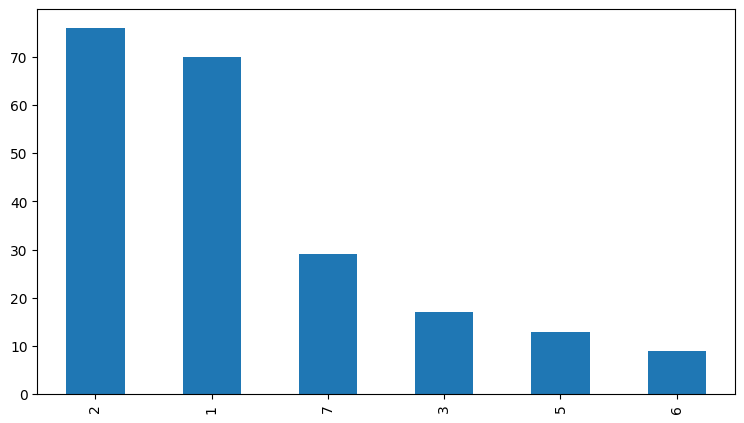

In [9]:
plt.figure(figsize=(9,5))
data.Type.value_counts().plot(kind="bar")

In [10]:
x=data.iloc[:,:9]
y=data.iloc[:,9]

In [11]:
x,y

(          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
 0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
 1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
 2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
 3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
 4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
 ..       ...    ...   ...   ...    ...   ...   ...   ...  ...
 209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
 210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
 211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
 212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
 213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0
 
 [214 rows x 9 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 209    7
 210    7
 211    7
 212    7
 213    7
 Name: Type, Length: 214, dtype: int64)

In [15]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [16]:
x_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [17]:
x_train_scaled,x_test_scaled,y_train, y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=15)

In [18]:
x_train_scaled.shape

(171, 9)

In [19]:
x_test_scaled.shape

(43, 9)

In [20]:
y_train.shape, y_test.shape

((171,), (43,))

#MODEL

In [21]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
pred=model.predict(x_test_scaled)

In [23]:
pred

array([2, 1, 1, 7, 5, 2, 1, 2, 2, 2, 1, 1, 7, 1, 6, 6, 1, 1, 1, 1, 1, 2,
       5, 2, 1, 1, 2, 1, 2, 7, 1, 2, 1, 2, 2, 2, 7, 1, 1, 2, 2, 1, 2])

In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.58      0.85      0.69        13
           2       0.75      0.63      0.69        19
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      0.80      0.89         5

    accuracy                           0.72        43
   macro avg       0.87      0.72      0.77        43
weighted avg       0.76      0.72      0.73        43



In [25]:
f1 = f1_score(y_test,pred, average='weighted')

In [26]:
f1

0.7258259505352528

In [27]:
#f1score

r=[]
for k in range(1,40,2):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_scaled, y_train)
    pred=model.predict(x_test_scaled)
    r.append(f1_score(y_test,pred, average='weighted'))

In [30]:
r

[0.7081442308386975,
 0.7258259505352528,
 0.7464657831124447,
 0.6473743435858964,
 0.6025911883376249,
 0.6002214839424141,
 0.6011112729042211,
 0.5802168447517284,
 0.6016038492381716,
 0.5791670042946276,
 0.5360181508791833,
 0.5157177225340818,
 0.4940590189564198,
 0.47004933051444675,
 0.4919484072698847,
 0.45075239398084815,
 0.4456604347165223,
 0.3958489622405601,
 0.3682170542635659,
 0.3958489622405601]

Text(0.5, 1.0, 'K-value VS f1-score')

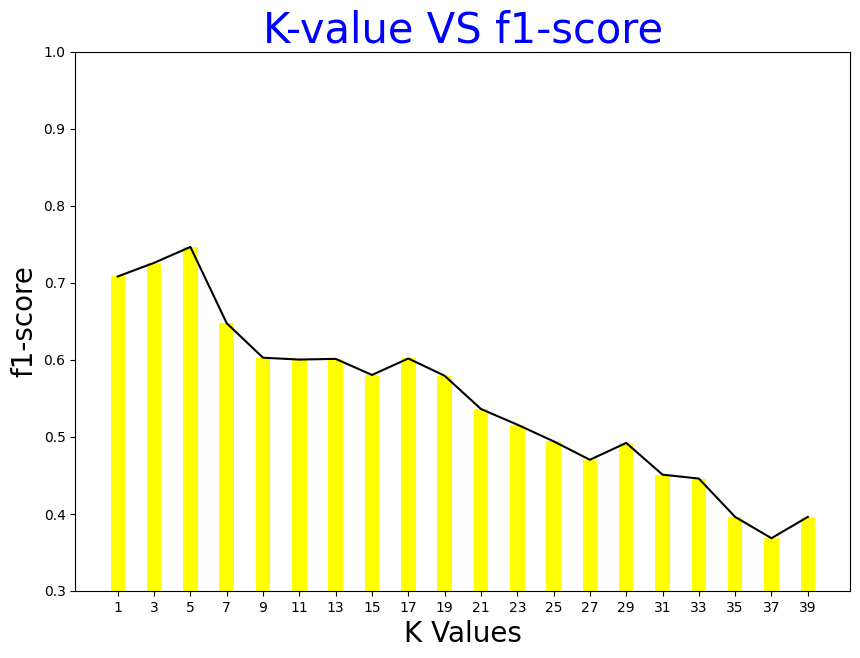

In [29]:
plt.figure(figsize=(10,7))
plt.bar(range(1,40,2),r,color='yellow')
plt.plot(range(1,40,2),r,color='black')
plt.ylim(0.3,1)
plt.xticks(range(1,40,2))
plt.xlabel("K Values",size=20)
plt.ylabel("f1-score",size=20)
plt.title("K-value VS f1-score",color='blue',size=30)

#Inferences

In [39]:
new_data = np.array([[1.52101,13.64	,5.49,2.10,71.78,	0.06	,8.75	,0.0,0.01]])
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data)

predictions = model.predict(new_data_scaled)

In [40]:
predictions

array([1])